In [69]:
import parsnip
import h5py
import lcdata
import astropy
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
import statistics
from astropy.io import ascii as asc
import sncosmo
from astropy.cosmology import Planck18

In [70]:
dataset = lcdata.read_hdf5('./dataset_554_lsst.h5')

In [71]:
dataset_ps1 = lcdata.read_hdf5('./dataset_554_ps1.h5')

In [72]:
updated_rs = {}

In [73]:
with open('DESIRT_hosts_redshifts_fujilupe_Y1.csv', 'r') as f:
    file = f.readlines()
    for i in file[1:]:
        transt = i.split(',')
        updated_rs[transt[0]] = float(transt[2])
        

In [74]:
file[0]

'# TransientID, HOST_TARGETID, REDSHIFT, CHI2, SPECTYPE, ZWARN\n'

In [8]:
dataset.meta[5]

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err
str23,float64,float64,str7,float64,int64,float32,float32
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479


In [76]:

for i in range(0,len(dataset)):
    l_c = dataset.meta[i]
    if l_c['object_id'] in updated_rs.keys():
        rs = updated_rs[l_c['object_id']]
        l_c['redshift'] = rs
        l_c['z_spec_exists'] = 1

In [77]:

for i in range(0,len(dataset_ps1)):
    l_c = dataset_ps1.meta[i]

    if l_c['object_id'] in updated_rs.keys():
        #print(l_c['object_id'])
        rs = updated_rs[l_c['object_id']]
        l_c['redshift'] = rs
        l_c['z_spec_exists'] = 1

In [3]:
print(dataset.light_curves[0]['band'][1])

for i in range(0,len(dataset)):
    #dataset.light_curves[i]['band'] = dataset.light_curves[i]['band'].astype(np.dtype('U6'))
    l_c = dataset.light_curves[i]
    for j in range(0,len(l_c)):
        band = l_c['band'][j]
        if 'r' in band:
            dataset.light_curves[i]['band'][j] = 'desr'
        if 'g' in band:
            dataset.light_curves[i]['band'][j] = 'desg'
        if 'z' in band:
            dataset.light_curves[i]['band'][j] = 'desz'

print(dataset.light_curves[0]['band'])

lsstg
band
----
desr
desg
desr
desr
desz
desr
desz
desr
desz
desr
desz
desr


In [5]:
dataset_25 = lcdata.read_hdf5('./dataset_des_25.h5')

In [14]:
dataset_25_50 = lcdata.read_hdf5('./dataset_des_25_to_50.h5')

In [85]:
dataset.meta

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err
str23,float64,float64,str7,float64,int64,float32,float32
A202103221407558m001825,211.98278629,-0.30695087,Unknown,0.4217931032180786,0,0.4217931,0.08276691
A202103221408139m033502,212.05795218,-3.58394667,Unknown,0.7430001497268677,0,0.74300015,0.123186514
A202103221408412p002445,212.17173702,0.41252734,Unknown,0.3237484824681474,1,0.30602825,0.04898929
A202103221408578m005300,212.2412,-0.8833,Unknown,0.6358600244900215,1,0.8038441,0.08160352
A202103221409059m023156,212.27475706,-2.53247783,Unknown,0.5241751670837402,0,0.52417517,0.16277674
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479
...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,Unknown,0.15156035125255585,0,0.15156035,0.047065422
T202106021434224p023158,218.59339421,2.53281567,Unknown,0.9559399485588074,0,0.95593995,0.22913234


In [21]:
a = Table.read('./observations0.hdf5')
a.meta

{'dec': 2.06801773,
 'dec_host': 2.06790543,
 'hostgal_photoz': 0.6159648,
 'hostgal_photoz_err': 0.026054185,
 'object_id': 'A202105301428199p020404',
 'ra': 217.08302358,
 'ra_host': 217.08296864,
 'redshift': 0.6030676,
 'type': 'Unknown',
 'z_spec_exists': 1}

In [2]:
source = parsnip.ParsnipSncosmoSource('plasticc')
model = sncosmo.Model(source=source)
result, fitted_model = sncosmo.fit_lc(dataset_25.light_curves[1], model,['t0', 'z', 'amplitude', 's1', 's2', 's3', 'color'],bounds={'z': (0.01,1.)})

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/parsnip.py:289: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


NameError: name 'dataset_25' is not defined

In [78]:
model = parsnip.load_model('plasticc')

In [119]:
model.settings

{'model_version': 1,
 'min_wave': 1000.0,
 'max_wave': 11000.0,
 'spectrum_bins': 300,
 'max_redshift': 4.0,
 'band_oversampling': 51,
 'time_window': 300,
 'time_pad': 100,
 'time_sigma': 20.0,
 'color_sigma': 0.3,
 'magsys': 'ab',
 'error_floor': 0.01,
 'batch_size': 128,
 'learning_rate': 0.001,
 'scheduler_factor': 0.5,
 'min_learning_rate': 1e-05,
 'penalty': 0.001,
 'latent_size': 3,
 'input_redshift': True,
 'encode_block': 'residual',
 'encode_conv_architecture': [40, 80, 120, 160, 200, 200, 200],
 'encode_conv_dilations': [1, 2, 4, 8, 16, 32, 64],
 'encode_fc_architecture': [200],
 'encode_time_architecture': [200],
 'encode_latent_prepool_architecture': [200],
 'encode_latent_postpool_architecture': [200],
 'decode_architecture': [40, 80, 160],
 'derived_settings_calculated': True,
 'bands': ['lsstu', 'lsstg', 'lsstr', 'lssti', 'lsstz', 'lssty'],
 'band_mw_extinctions': array([0., 0., 0., 0., 0., 0.]),
 'band_correct_background': array([ True,  True,  True,  True,  True,  Tru

In [79]:
model_ps1 = parsnip.load_model('ps1')

In [80]:
predictions = model.predict_dataset(dataset)

Preprocessing dataset: 100%|█████████████████| 554/554 [00:05<00:00, 109.20it/s]


In [81]:
predictions_ps1 = model_ps1.predict_dataset(dataset_ps1)

Preprocessing dataset: 100%|█████████████████| 554/554 [00:04<00:00, 136.27it/s]


In [15]:
classifier_plasticc = parsnip.Classifier.load('./predictions/classifier')
classifier_ps1 = parsnip.Classifier.load('./predictions/classifier_ps1')

In [82]:
classifications_plasticc = classifier_plasticc.classify(predictions)
classifications_ps1 = classifier_ps1.classify(predictions_ps1)

In [98]:
classifications_ps1_onPLASTICCclassifier = classifier_plasticc.classify(predictions_ps1)

In [95]:
classifications_plasticc_onPS1classifier = classifier_ps1.classify(predictions)

In [93]:
classifications_ps1_on_plasticcPred = classifier_ps1.classify(predictions)

In [96]:
predictions_cpWithType_frmPS1_classifier = predictions.copy()

classification_dict_ps1_on_pltc = {}

keys_ps1 = ['SLSN', 'SNII', 'SNIIn', 'SNIa', 'SNIbc']
for i in classifications_ps1_on_plasticcPred:
    print(i['object_id'])
    prob = [i[key] for key in keys_ps1]
    classif = keys_ps1[prob.index(max(prob))]
    classification_dict_ps1_on_pltc[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys_ps1[prob.index(max(prob))], max(prob),'\n')
    
predictions_cpWithType_frmPS1_classifier.add_column(1.0, name='type_prob', index=4)

for i in predictions_cpWithType_frmPS1_classifier:
    print(i['object_id'])
    i['type'] = classification_dict_ps1_on_pltc[i['object_id']]['type']
    i['type_prob'] = classification_dict_ps1_on_pltc[i['object_id']]['prob']
    
predictions_cpWithType_frmPS1_classifier['type'] = predictions_cpWithType_frmPS1_classifier['type'].astype(bytes)

predictions_cpWithType_frmPS1_classifier

A202103221407558m001825

       SNII 0.8252505141134096 

A202103221408139m033502

       SNIa 0.8078865105127649 

A202103221408412p002445

       SNIa 0.7764334406589771 

A202103221408578m005300

       SNIa 0.8307515875219991 

A202103221409059m023156

       SNIbc 0.3735569804047012 

A202103221409405p003222

       SNIa 0.8214180129456959 

A202103221410297m035538

       SNIbc 0.651502106081497 

A202103221410376p013632

       SNII 0.5842383596215882 

A202103221411041m031721

       SNIa 0.8267931745572381 

A202103221411363p015959

       SNIa 0.7139316672697702 

A202103221412177p010939

       SNII 0.9264663678267349 

A202103221415141m004911

       SNIa 0.6200208865845233 

A202103221415411m034637

       SNIbc 0.3562549354102232 

A202103221415420m010306

       SNII 0.4887519271825254 

A202103221415434p012141

       SNII 0.6854444883576054 

A202103221415581p020343

       SNIa 0.8580977523770453 

A202103221416166p021022

       SNII 0.4502593850245192 

A20210322141

       SNIa 0.8202091978086028 

T202105121421061m000755

       SNIa 0.8359363474048271 

T202105121422252m004617

       SNII 0.731150993427455 

T202105121423187p000202

       SNII 0.6511256197024584 

T202105121426101m033357

       SNIa 0.7714421073907928 

T202105121427568m032611

       SNII 0.5274308827987934 

T202105121429255p013409

       SNII 0.9702192492149319 

T202105121434539m025812

       SNII 0.5169241657992492 

T202105121442475p005536

       SNII 0.9634583587767345 

T202105121443159m024132

       SNII 0.9798769822937675 

T202105121446450p002414

       SNII 0.4422140787229699 

T202105121446584p005442

       SNIa 0.7997964970596447 

T202105121449009m033052

       SNII 0.42687061535237164 

T202105151405105p012827

       SNIa 0.6121836731490944 

T202105151423088p020125

       SNII 0.8543224360557765 

T202105151432383p020947

       SNIa 0.836545898834952 

T202105151443595m004309

       SNII 0.36398769677034976 

T202105151444107p011555

       SNIa 0.

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNII,0.8252505141134096,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,SNIa,0.8078865105127649,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,SNIa,0.7764334406589771,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.65363237401,1.0409393,-0.16585393,0.01361278,0.020475218,0.00014468587,-1.6875587,0.06481298,3.2698743,0.06858045,-0.29564258,0.13433968,171.9202,49,49,49,0,7,39,3,1074.0333,43,-11.99311493112694,0.0076723406
A202103221408578m005300,212.2412,-0.8833,SNIa,0.8307515875219991,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59308.839275827195,1.2802123,-0.37878993,0.05885995,0.0016548814,7.145598e-05,-1.1945161,0.21151802,0.079259805,0.538119,-0.80758893,0.75804836,23.573483,2,2,2,0,2,0,0,0.007738496,-4,-11.002715299229855,0.046910077
A202103221409059m023156,212.27475706,-2.53247783,SNIbc,0.3735569804047012,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221409405p003222,212.41911883,0.53946084,SNIa,0.8214180129456959,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,143.93268,54,54,54,0,8,40,6,1284.887,48,-12.881999688490467,0.008678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIbc,0.7280534416653872,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,16.061172,2,2,2,0,0,2,0,1.6441689,-4,-10.48742033067903,0.06848387
T202106021434224p023158,218.59339421,2.53281567,SNIa,0.7817988316896548,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,142.9434,6,6,6,0,6,0,0,562.3222,0,-14.150708067244658,0.010159083


In [83]:
predictions_ps1_cpWithType = predictions_ps1.copy()

classification_dict_ps1_on_pltc = {}

keys_ps1 = ['SLSN', 'SNII', 'SNIIn', 'SNIa', 'SNIbc']
for i in classifications_ps1:
    print(i['object_id'])
    prob = [i[key] for key in keys_ps1]
    classif = keys_ps1[prob.index(max(prob))]
    classification_dict_ps1_on_pltc[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys_ps1[prob.index(max(prob))], max(prob),'\n')
    
predictions_ps1_cpWithType.add_column(1.0, name='type_prob', index=4)

for i in predictions_ps1_cpWithType:
    print(i['object_id'])
    i['type'] = classification_dict_ps1_on_pltc[i['object_id']]['type']
    i['type_prob'] = classification_dict_ps1_on_pltc[i['object_id']]['prob']
    
predictions_ps1_cpWithType['type'] = predictions_ps1_cpWithType['type'].astype(bytes)

predictions_ps1_cpWithType

A202103221407558m001825

       SNIa 0.8688579647340868 

A202103221408139m033502

       SNIIn 0.5588883368837989 

A202103221408412p002445

       SNIIn 0.7754714580206865 

A202103221408578m005300

       SNII 0.45591846251186235 

A202103221409059m023156

       SNII 0.8219824997314034 

A202103221409405p003222

       SNII 0.5218461421653648 

A202103221410297m035538

       SNII 0.7489583314003125 

A202103221410376p013632

       SNIa 0.688356364073152 

A202103221411041m031721

       SNII 0.5417444173659083 

A202103221411363p015959

       SNIa 0.5921638913399188 

A202103221412177p010939

       SNIa 0.5843566760595087 

A202103221415141m004911

       SNII 0.5815557448472053 

A202103221415411m034637

       SNIa 0.9128771242108389 

A202103221415420m010306

       SNII 0.5152141356514535 

A202103221415434p012141

       SNIa 0.9015345441642427 

A202103221415581p020343

       SNII 0.44106033919574444 

A202103221416166p021022

       SNII 0.6139511828858665 

A2021032214

       SNIa 0.8568852073141592 

T202105061449334m033318

       SNIa 0.9050736657811654 

T202105121420052p001115

       SNIbc 0.6332781181231143 

T202105121421061m000755

       SNIa 0.32817559808783037 

T202105121422252m004617

       SNIa 0.8734339724732424 

T202105121423187p000202

       SNIbc 0.40113508134872805 

T202105121426101m033357

       SNIa 0.33896914883355994 

T202105121427568m032611

       SNIa 0.9135410005847684 

T202105121429255p013409

       SNIa 0.8536908505071585 

T202105121434539m025812

       SNIa 0.8959581336934583 

T202105121442475p005536

       SNIa 0.878017239124145 

T202105121443159m024132

       SNIa 0.6219675239774499 

T202105121446450p002414

       SNIa 0.9101787621791916 

T202105121446584p005442

       SNII 0.5555848012257265 

T202105121449009m033052

       SNIa 0.9105245371661539 

T202105151405105p012827

       SNIa 0.9078886638246011 

T202105151423088p020125

       SNIa 0.902024482318792 

T202105151432383p020947

       SNIa

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIa,0.8688579647340868,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408139m033502,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221408412p002445,212.17173702,0.41252734,SNIIn,0.7754714580206865,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.707181186874,1.0279852,-0.24719404,0.013471938,0.06378373,0.00045124843,-0.9124769,0.1392241,1.831691,0.22659318,2.0353913,0.04291274,171.9202,49,49,49,0,7,39,3,1140.1533,43,-13.226816637059557,0.0076813684
A202103221408578m005300,212.2412,-0.8833,SNII,0.45591846251186235,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59306.46351956346,3.1903667,-0.27545762,0.07523095,0.013014297,0.00056924217,-0.50736445,0.54011226,-0.0766109,0.9859226,0.8971982,0.20085725,23.573483,2,2,2,0,2,0,0,14.077181,-4,-13.241851041417355,0.047520164
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8219824997314034,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221409405p003222,212.41911883,0.53946084,SNII,0.5218461421653648,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59298.07701844453,1.6209389,-0.32516658,0.02239317,0.035657674,0.00028362504,-1.190538,0.19155817,1.774309,0.30661708,1.4615288,0.041746482,143.93268,54,54,54,0,6,37,11,946.7516,48,-13.41692705665453,0.008636259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa,0.9009272984966492,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59360.24276285005,4.176531,-0.09809215,0.13542031,0.040168744,0.0025967995,-0.032097563,1.0566372,0.069191135,1.0616537,-0.12791462,0.6659242,16.061172,2,2,2,0,0,2,0,14.470034,-4,-10.871381054555982,0.07028793
T202106021434224p023158,218.59339421,2.53281567,SNII,0.799510368722591,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.29839377205,1.45469,-0.5018116,0.030152665,0.035277218,0.00032911473,-0.080592364,0.29223278,-0.30716813,0.8207831,1.3220334,0.1213977,142.9434,6,6,6,0,6,0,0,440.22345,0,-15.407994139022001,0.01012957


In [34]:
predictions_ps1_cpWithType

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIa,0.8688579647340868,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408139m033502,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221408412p002445,212.17173702,0.41252734,SNIIn,0.7754714580206865,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.707181186874,1.0279852,-0.24719404,0.013471938,0.06378373,0.00045124843,-0.9124769,0.1392241,1.831691,0.22659318,2.0353913,0.04291274,171.9202,49,49,49,0,7,39,3,1140.1533,43,-13.226816637059557,0.0076813684
A202103221408578m005300,212.2412,-0.8833,SNII,0.45591846251186235,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59306.46351956346,3.1903667,-0.27545762,0.07523095,0.013014297,0.00056924217,-0.50736445,0.54011226,-0.0766109,0.9859226,0.8971982,0.20085725,23.573483,2,2,2,0,2,0,0,14.077181,-4,-13.241851041417355,0.047520164
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8219824997314034,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221409405p003222,212.41911883,0.53946084,SNII,0.5218461421653648,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59298.07701844453,1.6209389,-0.32516658,0.02239317,0.035657674,0.00028362504,-1.190538,0.19155817,1.774309,0.30661708,1.4615288,0.041746482,143.93268,54,54,54,0,6,37,11,946.7516,48,-13.41692705665453,0.008636259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa,0.9009272984966492,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59360.24276285005,4.176531,-0.09809215,0.13542031,0.040168744,0.0025967995,-0.032097563,1.0566372,0.069191135,1.0616537,-0.12791462,0.6659242,16.061172,2,2,2,0,0,2,0,14.470034,-4,-10.871381054555982,0.07028793
T202106021434224p023158,218.59339421,2.53281567,SNII,0.799510368722591,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.29839377205,1.45469,-0.5018116,0.030152665,0.035277218,0.00032911473,-0.080592364,0.29223278,-0.30716813,0.8207831,1.3220334,0.1213977,142.9434,6,6,6,0,6,0,0,440.22345,0,-15.407994139022001,0.01012957


In [89]:
predictions_cpWithType.add_column(1.0, name='type_prob', index=4)

In [85]:
predictions.keys()

predictions_cpWithType = predictions.copy()

classification_dict = {}

print(classifications_plasticc.keys())

keys = ['KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE']
for i in classifications_plasticc:
    print(i['object_id'])
    prob = [i[key] for key in keys]
    classif = keys[prob.index(max(prob))]
    classification_dict[i['object_id']] = {'type':classif, 'prob': max(prob)}
    print('\n      ', keys[prob.index(max(prob))], max(prob),'\n')
    
    

['object_id', 'KN', 'SLSN-I', 'SNII', 'SNIa', 'SNIa-91bg', 'SNIax', 'SNIbc', 'TDE']
A202103221407558m001825

       SNIax 0.8434849414551634 

A202103221408139m033502

       TDE 0.9914831482825882 

A202103221408412p002445

       TDE 0.842894231383489 

A202103221408578m005300

       TDE 0.8640298760061544 

A202103221409059m023156

       SNII 0.8084251918163796 

A202103221409405p003222

       TDE 0.7441990176968774 

A202103221410297m035538

       SNII 0.877643423085843 

A202103221410376p013632

       SNIax 0.8538934181854385 

A202103221411041m031721

       TDE 0.9785970381708896 

A202103221411363p015959

       KN 0.7886832807821794 

A202103221412177p010939

       SNIax 0.6863793508026397 

A202103221415141m004911

       KN 0.5289445186421406 

A202103221415411m034637

       KN 0.5114594066635206 

A202103221415420m010306

       SNIax 0.5824444939678723 

A202103221415434p012141

       KN 0.441434637047181 

A202103221415581p020343

       TDE 0.7172660157266892 

A


       TDE 0.9042414457388082 

T202105241207475m012237

       TDE 0.7260784299745741 

T202105241208157m022003

       SNIax 0.2712516884668509 

T202105241208462m021754

       TDE 0.27935553552233283 

T202105241209012p000429

       TDE 0.7769510146130021 

T202105241209144p010706

       SNIax 0.6586178629768482 

T202105241209215m011243

       KN 0.3381806180690245 

T202105241209444p002250

       TDE 0.47876941817085683 

T202105241210580p003234

       TDE 0.7875481939348609 

T202105241214185m002735

       KN 0.596815584254556 

T202105241215387p003025

       SNIax 0.3089598631966829 

T202105241217452p015741

       SNIax 0.6011975216496205 

T202105241219403m003519

       TDE 0.7475553382083978 

T202105241221477m002825

       TDE 0.36258873986000917 

T202105241402453p061222

       KN 0.7175685361253 

T202105271158002m012128

       KN 0.2457645678700006 

T202105271158045m012917

       SNII 0.38868922112351134 

T202105271200139p012106

       TDE 0.762740810699

In [86]:
predictions_cpWithType

object_id,ra,dec,type,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,str7,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,Unknown,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,Unknown,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,Unknown,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.65363237401,1.0409393,-0.16585393,0.01361278,0.020475218,0.00014468587,-1.6875587,0.06481298,3.2698743,0.06858045,-0.29564258,0.13433968,171.9202,49,49,49,0,7,39,3,1074.0333,43,-11.99311493112694,0.0076723406
A202103221408578m005300,212.2412,-0.8833,Unknown,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59308.839275827195,1.2802123,-0.37878993,0.05885995,0.0016548814,7.145598e-05,-1.1945161,0.21151802,0.079259805,0.538119,-0.80758893,0.75804836,23.573483,2,2,2,0,2,0,0,0.007738496,-4,-11.002715299229855,0.046910077
A202103221409059m023156,212.27475706,-2.53247783,Unknown,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221409405p003222,212.41911883,0.53946084,Unknown,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,143.93268,54,54,54,0,8,40,6,1284.887,48,-12.881999688490467,0.008678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,Unknown,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,16.061172,2,2,2,0,0,2,0,1.6441689,-4,-10.48742033067903,0.06848387
T202106021434224p023158,218.59339421,2.53281567,Unknown,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,142.9434,6,6,6,0,6,0,0,562.3222,0,-14.150708067244658,0.010159083


In [87]:
predictions_cpWithType['type'] = predictions_cpWithType['type'].astype('S9')

In [90]:
#predictions_cpWithType.add_column(1.0, name='type_prob', index=4)

for i in predictions_cpWithType:
    print(i['object_id'])
    i['type'] = classification_dict[i['object_id']]['type']
    i['type_prob'] = classification_dict[i['object_id']]['prob']
    
#predictions_cpWithType['type'] = predictions_cpWithType['type'].astype(np.bytes9)

predictions_cpWithType

A202103221407558m001825
A202103221408139m033502
A202103221408412p002445
A202103221408578m005300
A202103221409059m023156
A202103221409405p003222
A202103221410297m035538
A202103221410376p013632
A202103221411041m031721
A202103221411363p015959
A202103221412177p010939
A202103221415141m004911
A202103221415411m034637
A202103221415420m010306
A202103221415434p012141
A202103221415581p020343
A202103221416166p021022
A202103221416444m013014
A202103221419493m005423
A202103221421240m003354
A202103221422364m011342
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221425535p014857
A202103221426202m015037
A202103221428463p020055
A202103221429185p000158
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221435424m001446
A202103221435448m004458
A202103221437106m015403
A202103221437253m032002
A202103221437327p002223
A202103221437382p020501
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221443116

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,211.98278629,-0.30695087,SNIax,0.8434849414551634,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59305.87038176327,0.4926387,0.105582535,0.027081374,0.01618141,0.00042973968,0.6650888,0.19455063,0.6061594,0.393575,0.8347892,0.6370112,38.465424,12,12,11,0,3,9,0,14.452319,6,-12.409868292733535,0.028841326
A202103221408139m033502,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221408412p002445,212.17173702,0.41252734,TDE,0.842894231383489,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.65363237401,1.0409393,-0.16585393,0.01361278,0.020475218,0.00014468587,-1.6875587,0.06481298,3.2698743,0.06858045,-0.29564258,0.13433968,171.9202,49,49,49,0,7,39,3,1074.0333,43,-11.99311493112694,0.0076723406
A202103221408578m005300,212.2412,-0.8833,TDE,0.8640298760061544,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59308.839275827195,1.2802123,-0.37878993,0.05885995,0.0016548814,7.145598e-05,-1.1945161,0.21151802,0.079259805,0.538119,-0.80758893,0.75804836,23.573483,2,2,2,0,2,0,0,0.007738496,-4,-11.002715299229855,0.046910077
A202103221409059m023156,212.27475706,-2.53247783,SNII,0.8084251918163796,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59304.703880666275,1.4192014,0.16922972,0.041719835,0.018206725,0.00050075626,-1.6406775,0.18364602,2.180085,0.2144688,-0.17572959,0.39899728,37.493214,21,21,20,0,4,17,0,49.719727,15,-13.100077817753721,0.029869553
A202103221409405p003222,212.41911883,0.53946084,TDE,0.7441990176968774,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59304.26941556214,0.61605155,-0.11097655,0.01366284,0.021786217,0.00017413644,-0.92042613,0.04726858,2.1193085,0.084128134,-0.04418336,0.18236527,143.93268,54,54,54,0,8,40,6,1284.887,48,-12.881999688490467,0.008678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,217.71235254,-2.52388313,SNIa-91bg,0.4333369852114458,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59361.83310298753,6.820371,0.20949444,0.11436684,0.028203549,0.0017766113,-0.029053539,0.5851649,0.6985913,0.97705156,0.2300153,0.96291125,16.061172,2,2,2,0,0,2,0,1.6441689,-4,-10.48742033067903,0.06848387
T202106021434224p023158,218.59339421,2.53281567,TDE,0.6935790868107501,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.72673849861,0.7080797,-0.3761259,0.05166125,0.011081017,0.00010368031,-1.6035761,0.26115957,-0.726273,0.46153384,-0.07038915,0.85579693,142.9434,6,6,6,0,6,0,0,562.3222,0,-14.150708067244658,0.010159083


Macro averaged completeness (Villar et al. 2020): 0.1767
Fraction correct: 0.0704


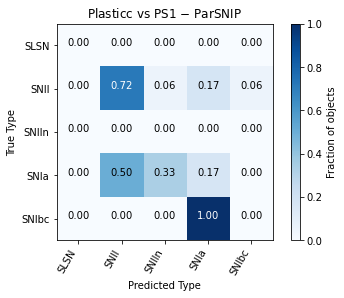

In [91]:
parsnip.plot_confusion_matrix(predictions_cpWithType, classifications_ps1,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1_updated_rs.pdf')

Macro averaged completeness (Villar et al. 2020): 0.1872
Fraction correct: 0.0289


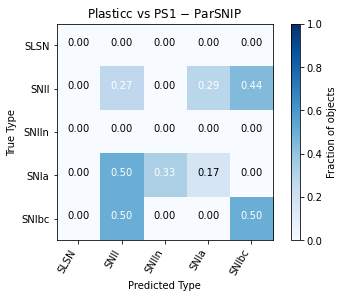

In [94]:
#classifications_ps1_on_plasticcPred

parsnip.plot_confusion_matrix(predictions_cpWithType, classifications_ps1_on_plasticcPred,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1_onPlscPred_updated_rs.pdf')

Macro averaged completeness (Villar et al. 2020): 0.4845
Fraction correct: 0.3285


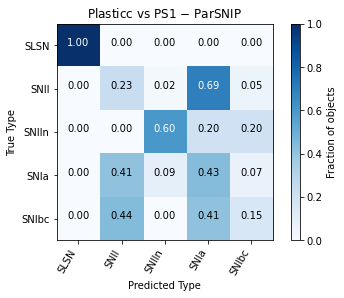

In [97]:
#predictions_cpWithType_frmPS1_classifier
parsnip.plot_confusion_matrix(predictions_cpWithType_frmPS1_classifier, classifications_ps1,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_ps1ClassifierOnPlasticc_Ps1_updated_rs.pdf')

Macro averaged completeness (Villar et al. 2020): 0.3473
Fraction correct: 0.4946


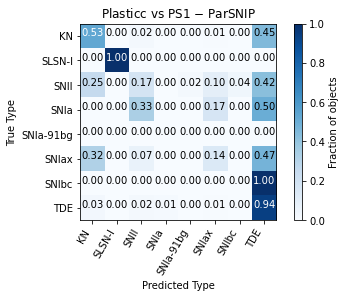

In [99]:
# classifications_ps1_onPLASTICCclassifier

parsnip.plot_confusion_matrix(predictions_cpWithType, classifications_ps1_onPLASTICCclassifier,
                              title='Plasticc vs PS1 $-$ ParSNIP')
plt.savefig('DECam_confusion_matrix_Plasticc_Ps1_updated_rs_bothclassifiedPLasticc.pdf')

In [92]:
names_dict = {}
with open('TNS_names.csv', 'r') as f:
    for line in f.readlines()[1:]:
        line = line[:-1]
        obj = line.split(',')
        names_dict[obj[0]]=obj[1]
        
names_dict    

{'A202103221409059m023156': '2021jbz',
 'T202103221422063m031255': '2021hmo',
 'A202103221425535p014857': '2021jca',
 'T202103221433335p003357': '2021hmt',
 'A202103221416444m013014': '2021jwt',
 'T202103221428086p020737': '2021ftc',
 'A202103221448353m005406': '2021jcb',
 'A202103221409405p003222': '2020lng',
 'T202103221424440m020040': '2021gwm',
 'T202103221439411p011439': '2021hmp',
 'A202103221435010m003706': '2021jcc',
 'T202103221409554p014131': '2021hmk',
 'T202103221424573m001202': '2021hmj',
 'A202103221443116m002550': '2021jcd',
 'A202103221428463p020055': '2021jce',
 'T202103221427063m023806': '2021hnc',
 'T202103221430049m033128': '2021hml',
 'A202103221442037p000433': '2021jcf',
 'A202103221437106m015403': '2021jcg',
 'A202103221437327p002223': '2021jch',
 'A202103221411363p015959': '2021jci',
 'A202103221413127m004507': '2021jcj',
 'T202103221431592m030122': '2021hmv',
 'T202103221420047m010147': '2021hno',
 'T202103221451132m005529': '2021hne',
 'T202103221427560p001243

In [30]:
names_dict['T202103221422216m001038']

'2021fxl'

In [112]:
predictions_cpWithType.remove_column('TNS_Name')

In [93]:
predictions_cpWithType.add_column('Unknown_TNS_Name', name='TNS_Name', index=1)

for i in predictions_cpWithType:
    print(i['object_id'])
    try:
        i['TNS_Name'] = names_dict[i['object_id']]
    except KeyError as msg:
        print('no transient name for:', msg)
        i['TNS_Name'] = 'nan'
        continue


A202103221407558m001825
A202103221408139m033502
A202103221408412p002445
A202103221408578m005300
A202103221409059m023156
A202103221409405p003222
A202103221410297m035538
A202103221410376p013632
A202103221411041m031721
A202103221411363p015959
A202103221412177p010939
A202103221415141m004911
A202103221415411m034637
A202103221415420m010306
A202103221415434p012141
A202103221415581p020343
A202103221416166p021022
A202103221416444m013014
A202103221419493m005423
A202103221421240m003354
A202103221422364m011342
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221425535p014857
A202103221426202m015037
A202103221428463p020055
A202103221429185p000158
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221435424m001446
A202103221435448m004458
A202103221437106m015403
A202103221437253m032002
A202103221437327p002223
A202103221437382p020501
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221443116

In [94]:
predictions_ps1_cpWithType.add_column('Unknown_TNS_Name', name='TNS_Name', index=1)

for i in predictions_ps1_cpWithType:
    print(i['object_id'])
    try:
        i['TNS_Name'] = names_dict[i['object_id']]
    except KeyError as msg:
        #print('no transient name for:', msg)
        i['TNS_Name'] = 'nan'
        continue

A202103221407558m001825
A202103221408139m033502
A202103221408412p002445
A202103221408578m005300
A202103221409059m023156
A202103221409405p003222
A202103221410297m035538
A202103221410376p013632
A202103221411041m031721
A202103221411363p015959
A202103221412177p010939
A202103221415141m004911
A202103221415411m034637
A202103221415420m010306
A202103221415434p012141
A202103221415581p020343
A202103221416166p021022
A202103221416444m013014
A202103221419493m005423
A202103221421240m003354
A202103221422364m011342
A202103221422581m024328
A202103221425310m001309
A202103221425464m000705
A202103221425535p014857
A202103221426202m015037
A202103221428463p020055
A202103221429185p000158
A202103221430059m013946
A202103221431564m034803
A202103221432532p005029
A202103221435010m003706
A202103221435424m001446
A202103221435448m004458
A202103221437106m015403
A202103221437253m032002
A202103221437327p002223
A202103221437382p020501
A202103221441336p003659
A202103221442037p000433
A202103221442452m011300
A202103221443116

In [95]:
predictions_ps1_cpWithType

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221407558m001825,2021jdw,211.98278629,-0.30695087,SNIa,0.8688579647340868,0.4217931032180786,0,0.4217931,0.08276691,59297.2699989584,1.5711246,59302.17549269467,1.2150722,-0.15461011,0.05487919,0.021979623,0.00058684585,-1.2346786,0.7328864,0.26192787,0.9544807,0.021548182,0.2542714,38.465424,12,12,11,0,3,9,0,30.041235,6,-12.74237828724037,0.028995553
A202103221408139m033502,2021jdn,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221408412p002445,2021jdg,212.17173702,0.41252734,SNIIn,0.7754714580206865,0.3237484824681474,1,0.30602825,0.04898929,59322.23610994359,5.7891965,59304.707181186874,1.0279852,-0.24719404,0.013471938,0.06378373,0.00045124843,-0.9124769,0.1392241,1.831691,0.22659318,2.0353913,0.04291274,171.9202,49,49,49,0,7,39,3,1140.1533,43,-13.226816637059557,0.0076813684
A202103221408578m005300,2021jdk,212.2412,-0.8833,SNII,0.45591846251186235,0.6358600244900215,1,0.8038441,0.08160352,59296.3223509691,1.0942659,59306.46351956346,3.1903667,-0.27545762,0.07523095,0.013014297,0.00056924217,-0.50736445,0.54011226,-0.0766109,0.9859226,0.8971982,0.20085725,23.573483,2,2,2,0,2,0,0,14.077181,-4,-13.241851041417355,0.047520164
A202103221409059m023156,2021jbz,212.27475706,-2.53247783,SNII,0.8219824997314034,0.5241751670837402,0,0.52417517,0.16277674,59297.30917632439,1.591225,59292.96008002617,4.604806,-0.03928942,0.07469038,0.043862615,0.0012157051,-0.5227707,0.4832094,0.23610501,0.8018099,1.4311117,0.14236173,37.493214,21,21,20,0,0,20,1,69.46919,15,-14.05473441870587,0.03010018
A202103221409405p003222,2020lng,212.41911883,0.53946084,SNII,0.5218461421653648,0.44698280096054077,0,0.4469828,0.17842479,59319.24343652009,3.992369,59298.07701844453,1.6209389,-0.32516658,0.02239317,0.035657674,0.00028362504,-1.190538,0.19155817,1.774309,0.30661708,1.4615288,0.041746482,143.93268,54,54,54,0,6,37,11,946.7516,48,-13.41692705665453,0.008636259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202106021430509m023125,nan,217.71235254,-2.52388313,SNIa,0.9009272984966492,0.15156035125255585,0,0.15156035,0.047065422,59367.24048404527,1.4390821,59360.24276285005,4.176531,-0.09809215,0.13542031,0.040168744,0.0025967995,-0.032097563,1.0566372,0.069191135,1.0616537,-0.12791462,0.6659242,16.061172,2,2,2,0,0,2,0,14.470034,-4,-10.871381054555982,0.07028793
T202106021434224p023158,nan,218.59339421,2.53281567,SNII,0.799510368722591,0.9559399485588074,0,0.95593995,0.22913234,59367.08861594002,11.768071,59386.29839377205,1.45469,-0.5018116,0.030152665,0.035277218,0.00032911473,-0.080592364,0.29223278,-0.30716813,0.8207831,1.3220334,0.1213977,142.9434,6,6,6,0,6,0,0,440.22345,0,-15.407994139022001,0.01012957


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anacon

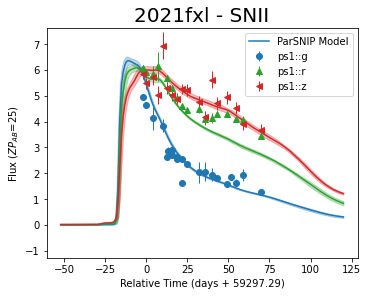

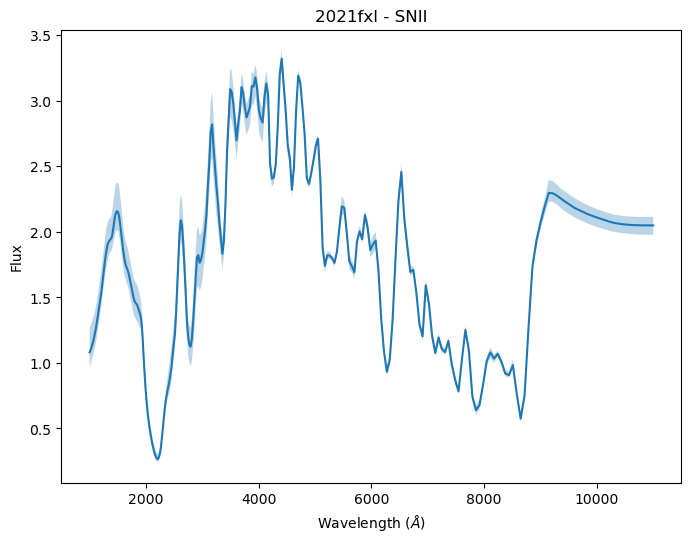

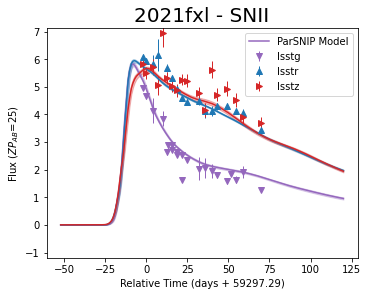

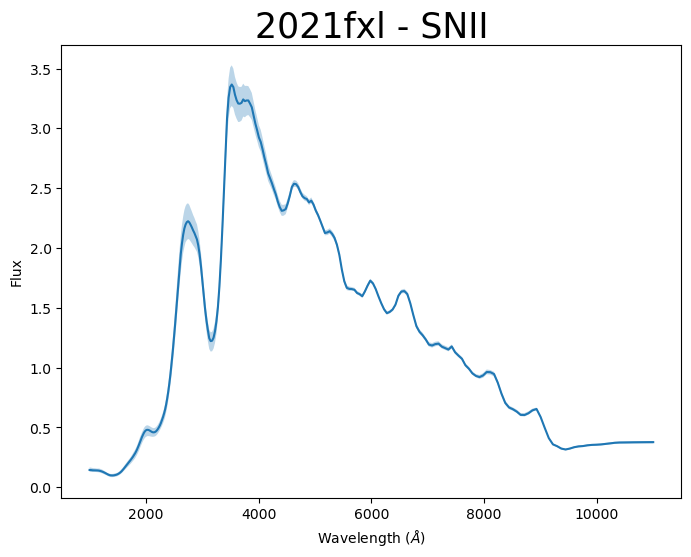

In [96]:
font = 20

for i in range(0,len(dataset_ps1)):
    if dataset.meta[i]['object_id'] == 'T202103221422216m001038':
        parsnip.plot_light_curve(dataset_ps1.light_curves[i], model_ps1)
        plt.title('2021fxl - SNII', fontsize = font)
        parsnip.plot_spectrum(dataset_ps1.light_curves[i], model_ps1, time=59297)
        plt.title('2021fxl - SNII')
        
for i in range(0,len(dataset)):
    if dataset.meta[i]['object_id'] == 'T202103221422216m001038':
        parsnip.plot_light_curve(dataset.light_curves[i], model)
        plt.title('2021fxl - SNII', fontsize=font)
        parsnip.plot_spectrum(dataset.light_curves[i], model, time=59297)
        plt.title('2021fxl - SNII', fontsize=font+5)

/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


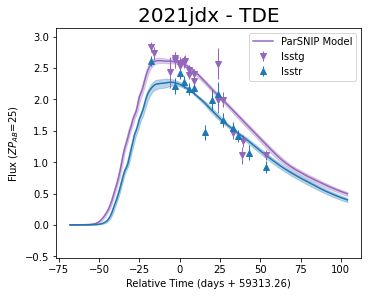

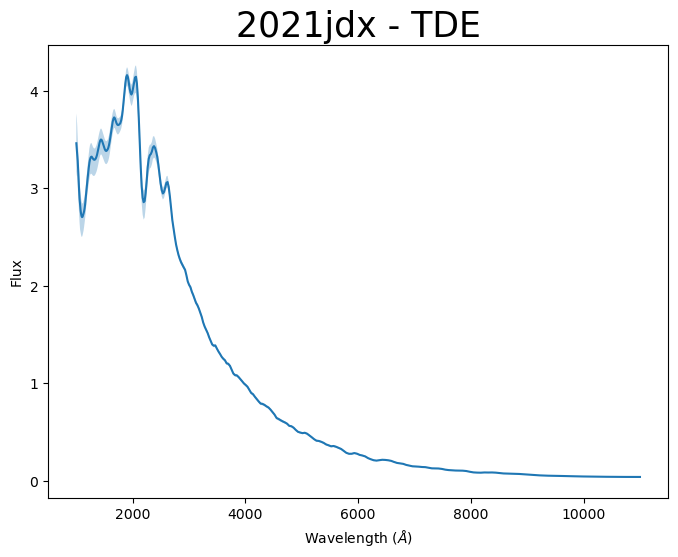

In [143]:
# A202103221425464m000705
# A202105301416541p015239

for i in range(0,len(dataset)):
    if dataset.meta[i]['object_id'] == 'A202103221425464m000705':
        parsnip.plot_light_curve(dataset.light_curves[i], model)
        plt.title('2021jdx - TDE', fontsize=font)
        parsnip.plot_spectrum(dataset.light_curves[i], model, time=59313)
        plt.title('2021jdx - TDE', fontsize=font+5)


/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,
/Users/EmilieCote/opt/anaconda3/lib/python3.9/site-packages/parsnip/plotting.py:81: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(band_time, band_flux, band_fluxerr, fmt='o', c=c, label=band_name,


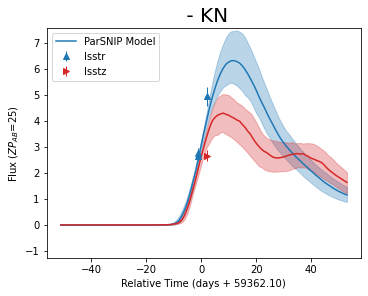

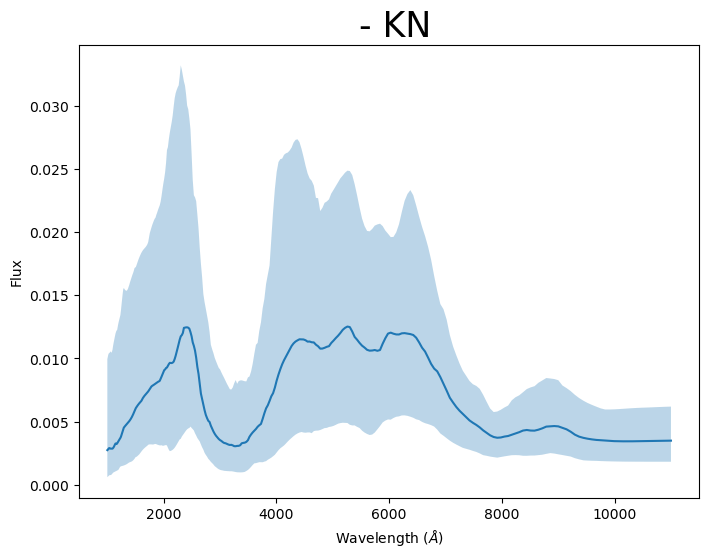

In [193]:
for i in range(0,len(dataset)):
    if dataset.meta[i]['object_id'] == 'T202105271216058m010626':
        parsnip.plot_light_curve(dataset.light_curves[i], model)
        plt.title(' - KN', fontsize=font)
        parsnip.plot_spectrum(dataset.light_curves[i], model, time=59352)
        plt.title(' - KN', fontsize=font+5)

(-2.9, 2.9)

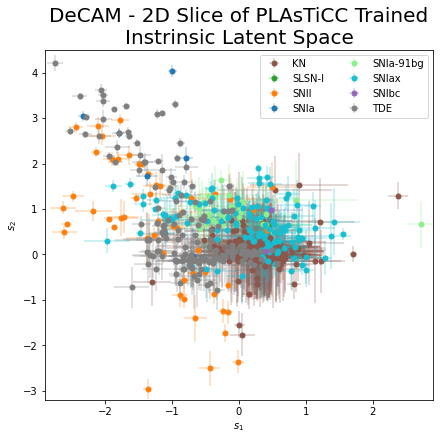

In [99]:
# Show the distributions of all of the transients.
# The CaRT, ILOT and PISN classes are "novel", and weren't included in the PLAsTiCC training set.
plasticc_plot_labels =['KN', 
                       'SLSN-I', 
                       'SNII', 
                       'SNIa', 
                       'SNIa-91bg', 
                       'SNIax', 
                       'SNIbc', 
                       'TDE']
use_pred = predictions_cpWithType.copy()
use_pred.sort('total_s2n', reverse=True)
parsnip.plot_representation(use_pred, plasticc_plot_labels, idx1=1, idx2=2, max_count=554, legend_ncol=2)
plt.title('DeCAM - 2D Slice of PLAsTiCC Trained\nInstrinsic Latent Space', fontsize=20)
plt.ylim(-3.2, 4.5)
plt.xlim(-2.9, 2.9)

(-2.5, 2.6)

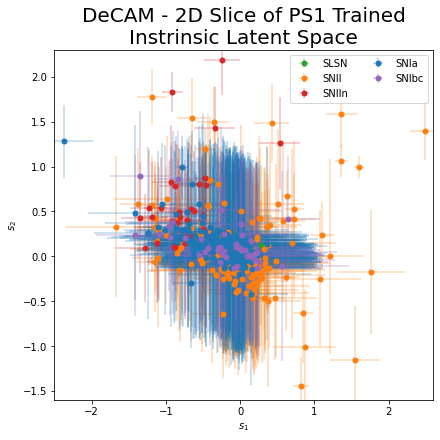

In [100]:
# Show the distributions of all of the transients.
# The CaRT, ILOT and PISN classes are "novel", and weren't included in the PLAsTiCC training set.
ps1_plot_labels =['SLSN',
                 'SNII', 
                 'SNIIn',
                 'SNIa', 
                 'SNIbc']
use_pred = predictions_ps1_cpWithType.copy()
use_pred.sort('total_s2n', reverse=True)
parsnip.plot_representation(use_pred, ps1_plot_labels, idx1=1, idx2=2, max_count=554, legend_ncol=2)
plt.title('DeCAM - 2D Slice of PS1 Trained\nInstrinsic Latent Space', fontsize=20)
plt.ylim(-1.6, 2.3)
plt.xlim(-2.5, 2.6)

In [105]:
prob_list_plasticc = {'KN':[], 
                       'SLSN-I':[], 
                       'SNII':[], 
                       'SNIa':[], 
                       'SNIa-91bg':[], 
                       'SNIax':[], 
                       'SNIbc':[], 
                       'TDE':[] 
                        }

has_z_spec =           {'KN':0, 
                       'SLSN-I':0, 
                       'SNII':0, 
                       'SNIa':0, 
                       'SNIa-91bg':0, 
                       'SNIax':0, 
                       'SNIbc':0, 
                       'TDE':0 
                        }



In [106]:
for i in range(0,len(predictions_cpWithType)):
    prob_list_plasticc[predictions_cpWithType['type'][i]].append(predictions_cpWithType['type_prob'][i])
    has_z_spec[predictions_cpWithType['type'][i]] += predictions_cpWithType['z_spec_exists'][i]
    
tot_z = sum([has_z_spec[i] for i in has_z_spec.keys()])

In [107]:
tot_z

251

In [108]:
names = ('Type','Total','Objects with Prob > 0.8', 'Highest Prob', 'Lowest Prob', 'Mean Prob', 'Median Prob', 'Z-Spec Provided')

rows = []
for i in prob_list_plasticc.keys():
    prob_list = prob_list_plasticc[i]
    if len(prob_list)>0:
        tot = [len(prob_list)]
        gt8 = [len([j for j in prob_list if j>=0.8])]
        hp = [np.round(max(prob_list), 2)]
        lp = [np.round(min(prob_list), 2)]
        ap = [np.round(sum(prob_list)/len(prob_list), 2)]
        has_zspec = [has_z_spec[i]]
        md = [np.round(statistics.median(prob_list), 2)]
        row = [[i], tot, gt8, hp, lp, ap, md, has_zspec]
        rows.append(row)



In [109]:
stats_table = Table(rows[0], names=names, meta={'Model': 'plasticc', 'Classifier': 'plasticc'})

for row in rows[1:]:
    stats_table.add_row(row)

stats_table

Type,Total,Objects with Prob > 0.8,Highest Prob,Lowest Prob,Mean Prob,Median Prob,Z-Spec Provided
str9,int64,int64,float64,float64,float64,float64,int64
KN,184,32,0.95,0.25,0.63,0.67,86
SLSN-I,1,0,0.66,0.66,0.66,0.66,0
SNII,53,8,0.92,0.25,0.56,0.54,32
SNIa,6,0,0.72,0.28,0.51,0.49,3
SNIa-91bg,32,1,0.94,0.23,0.48,0.47,19
SNIax,116,20,0.97,0.24,0.6,0.6,64
SNIbc,2,0,0.38,0.2,0.29,0.29,2
TDE,160,68,1.0,0.24,0.72,0.76,45


In [147]:
prob_list_ps1 = {'SLSN':[],
                 'SNII':[], 
                 'SNIIn':[],
                 'SNIa':[], 
                 'SNIbc':[]}

has_zspec_ps1 = {'SLSN':0,
                 'SNII':0, 
                 'SNIIn':0,
                 'SNIa':0, 
                 'SNIbc':0}

In [111]:
countsgt3 = predictions_ps1_cpWithType[predictions_ps1_cpWithType['count']>3]

In [115]:
countsgt3_probgt95=countsgt3[countsgt3['type_prob']>0.95]
countsgt3_probgt95

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221435448m004458,2021jec,218.93674814,-0.74970493,SNII,0.9789981283840182,0.25739414831206414,1,0.2514849,0.017803311,59295.293727488235,1.7478122,59290.87892064543,5.5002728,0.04548791,0.10523572,0.06853909,0.0020802538,0.2589831,0.732799,-0.08260838,0.9281112,1.2431399,0.3147066,34.274937,10,10,10,0,0,10,0,50.872044,4,-12.733288768268565,0.032963704
A202103221452176m023029,2021jdh,223.07362559,-2.50810317,SNII,0.9768569980043038,0.3179844831249716,1,0.30119663,0.06323684,59297.338921025745,4.655219,59290.7395805869,4.6666274,0.021955073,0.07416432,0.12261381,0.0017304245,0.2638746,0.46547005,0.4295087,0.77366364,1.4354248,0.12190335,80.09012,37,36,36,0,0,24,12,517.8208,31,-13.891241451824612,0.015323828
A202103221453039m024020,2021jct,223.26664368,-2.67227598,SNII,0.9644574147321485,0.07450027211863287,1,0.09234915,0.015785733,59313.311823843425,3.109528,59292.06598567814,1.7502984,0.081777975,0.023704471,0.23482311,0.0022962368,1.1039016,0.16163245,0.23892042,0.36792818,1.6609406,0.05782298,110.15936,39,39,39,0,0,30,9,378.2036,33,-11.137511565984383,0.010617306
A202104061411100m003627,2021jer,212.79171617,-0.60764854,SNII,0.9729153983901384,0.2912894745278112,1,0.29974028,0.026814055,59319.24524767043,2.037442,59306.470166035906,4.325856,-0.029302059,0.0723388,0.06441705,0.0030338417,0.19255942,0.6021186,-0.3796338,0.91604084,1.6094592,0.22925587,22.038979,6,6,6,0,0,6,0,21.6294,0,-12.972948313502947,0.051172614
A202104061442064m005506,2021jfp,220.52684825,-0.91846162,SNII,0.9629757293443137,0.14187376169289415,1,0.3512533,0.121969365,59319.228867771526,1.8699425,59306.6207859539,3.3033516,0.04444716,0.056126237,0.09187305,0.0015866664,0.36380443,0.40728453,0.12961522,0.7284405,1.1747837,0.10138018,60.056934,35,35,35,0,0,35,0,113.8624,29,-11.613172820677143,0.018752754
A202105121431399m005958,2021kss,217.9166663,-0.99950091,SNII,0.9794385412710692,0.13716012271823905,1,0.119228855,0.019891916,59352.24315653544,1.7673916,59331.64937220317,7.2809057,0.08210434,0.12445039,0.097507305,0.0043716417,0.21935111,0.7269924,-0.32585642,0.9303888,1.453409,0.3476262,23.274677,6,6,6,0,0,6,0,30.945574,0,-11.598014271415202,0.04871057
T202103221422216m001038,2021fxl,215.59001105,-0.17736063,SNII,0.9903573870609004,0.07392855674739171,1,0.08053181,0.018955687,59297.294446093896,6.9440064,59292.82432852493,0.8220915,0.04475466,0.01087207,0.46940282,0.0025683723,1.363364,0.08710548,1.0631571,0.18187843,1.3711417,0.024894247,215.05833,57,57,56,0,0,44,13,859.98645,51,-11.871942374995612,0.0059407596
T202103221450298m032847,2020acfd,222.62433215,-3.47982742,SNII,0.9834714063012676,0.04278376470308825,1,0.05214488,0.035034474,59316.28937769284,4.026228,59270.51857614865,3.3839514,0.068321,0.03113093,0.32650554,0.0036276814,2.4923651,0.20354922,1.3974309,0.3239653,1.1230232,0.07367181,98.12681,29,29,29,0,0,14,15,120.120255,23,-10.242568635550725,0.012063714
T202104061422346p005521,2021jhx,215.64441635,0.92260295,SNII,0.9811800426898106,0.14965170935054237,1,0.15825783,0.039201785,59316.20982476209,2.1417909,59302.51626511548,4.312679,0.023192463,0.07533799,0.10365472,0.0019383866,0.14174089,0.5308185,-0.22954147,0.8532993,1.4381236,0.15479718,55.477932,23,23,23,0,0,23,0,104.99315,17,-11.870558768298267,0.020306058


In [126]:
predictions_cpWithType_gt95 = predictions_cpWithType[predictions_cpWithType['type_prob']> 0.95]
predictions_count7_gt9 = predictions_cpWithType_gt95[predictions_cpWithType_gt95['count']>7]

In [120]:
predictions_cpWithType_gt9_TDE = predictions_cpWithType_gt9[predictions_cpWithType_gt9['type']=='TDE']
predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['count']>9]

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221408139m033502,2021jdn,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221411041m031721,2021jdr,212.76742035,-3.28943047,TDE,0.9785970381708896,0.8402214646339417,0,0.84022146,0.10418564,59313.316726475445,1.5021149,59317.66872575828,0.45866308,-0.549179,0.010811923,0.0008615065,1.4802763e-05,-1.0449792,0.08016825,1.41542,0.101903394,-2.785593,0.23301482,59.503475,15,15,15,0,11,4,0,11.41143,9,-11.032951935400419,0.018657433
A202103221421240m003354,2021jdz,215.35039211,-0.56517704,TDE,0.9582733831207086,0.4533238069877418,1,0.5939132,0.11077015,59316.2448564746,1.5658109,59309.98152172347,0.8643438,-0.291096,0.016800093,0.0046324814,7.541139e-05,-1.662487,0.06836595,2.6984184,0.09399613,-0.2739979,0.18493591,63.805466,26,25,23,0,3,21,1,164.27557,20,-11.237410151361452,0.017676113
A202103221425310m001309,2021jee,216.37917165,-0.21932947,TDE,0.9858057870259092,0.5676800012588501,1,0.5807396,0.08762629,59316.24507673992,2.313075,59308.999775970115,0.57276565,-0.33760303,0.010674085,0.005042261,5.0402778e-05,-1.6407784,0.05890886,2.596947,0.07509585,-0.9562953,0.22064158,104.84085,31,31,30,0,4,27,0,233.2768,25,-11.914365302398153,0.010853441
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,TDE,0.9952970995575539,0.5664553642272949,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59305.63706645558,0.7292028,-0.5067899,0.008230554,0.0031009915,2.583044e-05,-1.154381,0.049347192,3.112995,0.0678253,-0.5244857,0.1536336,126.335594,34,34,34,0,3,28,3,134.18652,28,-11.380898839496737,0.00904412
A202103221432532p005029,2021jdm,218.22193313,0.84146706,TDE,0.9517175746836332,0.9144901143528067,1,0.77923274,0.10426579,59319.20536568281,2.412155,59312.571096922125,1.0373776,-0.27149713,0.013058557,0.004554138,8.198564e-05,-1.8501683,0.111871496,2.0416503,0.076142214,-1.1039388,0.23197512,59.051098,23,23,23,0,5,16,2,182.66736,17,-13.06682380418782,0.019548055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A202104091441292m022112,2021jxe,220.37180134,-2.35351716,TDE,0.9927216008488303,0.5207807421684265,0,0.52078074,0.08205064,59319.30940886887,2.239229,59336.93973800095,0.43203932,-0.39254904,0.014809362,0.0038086036,5.5376877e-05,-0.8734931,0.060695596,2.45078,0.10845429,-1.2937506,0.27606288,71.98624,25,25,25,0,11,14,0,119.10675,19,-11.384484793055265,0.01578767
A202104151434313p013508,2021jxv,218.63050514,1.58563753,TDE,0.9727033456364792,1.520920581782299,1,0.42633855,0.17844991,59346.147551208,1.5934914,59345.85233819411,2.9407134,-0.33199948,0.019836431,0.002256844,7.97028e-05,-1.8142118,0.18191658,2.363535,0.15447132,-0.8230208,0.48752016,29.407074,13,13,12,0,7,6,0,39.893944,7,-13.665474733941537,0.038359836


In [139]:
predictions_count7_gt9[18]

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202105121417199m014431,nan,214.33311786,-1.74211627,SNIax,0.971079328708256,0.3110264837741852,0,0.31102648,0.12918568,59352.231335479795,2.6276312,59356.42582305151,0.30310255,0.09870052,0.014465241,0.027666753,0.0003480906,0.15226868,0.12387942,0.9023846,0.27329046,-0.33227688,0.4136685,82.45776,23,23,23,0,19,4,0,52.47146,17,-12.21927440606666,0.013660973


In [130]:
obj_count7_gt9 = []
obj_count7_gt9_type = []

for i in predictions_count7_gt9:
    obj_count7_gt9.append(i['object_id'])
    obj_count7_gt9_type.append(i['type'])
    
obj_count7_gt9_type
    

['TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'SNIax',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE',
 'TDE']

In [128]:
rowsz = []

for row in predictions_ps1_cpWithType:
    tr = list(row)
    obid = tr[0]
    if obid in obj_count7_gt9:
        rowsz.append([[i]for i in tr])


ct7_95_ps1 = Table(TDE_rows[0], names=tuple(predictions_ps1_cpWithType.keys()), meta={'PS1_pred':'all count 7 above .95 found in PLAsTiCC'})
for row in rowsz[1:]:
    ct7_95_ps1.add_row(row)
    

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str7,float64,float64,str5,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221408139m033502,2021jdn,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221411041m031721,2021jdr,212.76742035,-3.28943047,SNII,0.5417444173659083,0.8402214646339417,0,0.84022146,0.10418564,59313.316726475445,1.5021149,59316.34586313316,1.8222833,-0.4019919,0.029416619,0.009955671,0.00017259613,-0.7322664,0.27596098,0.16002169,0.7717891,1.5923669,0.1454139,59.503475,15,15,15,0,11,4,0,73.3907,9,-13.68998204099124,0.018824738
A202103221421240m003354,2021jdz,215.35039211,-0.56517704,SNIIn,0.7600519928250016,0.4533238069877418,1,0.5939132,0.11077015,59316.2448564746,1.5658109,59299.80222761413,2.085619,-0.31960166,0.022245599,0.021253383,0.00034365035,-0.4527882,0.18826056,0.7999046,0.43068132,1.9272228,0.07931468,63.805466,26,25,23,0,3,20,2,110.94161,20,-12.891445719598757,0.017557006
A202103221425310m001309,2021jee,216.37917165,-0.21932947,SNIIn,0.5850809002663722,0.5678884892159864,1,0.5807396,0.08762629,59316.24507673992,2.313075,59306.124386394156,1.7831042,-0.30895162,0.018694097,0.03056258,0.00030420165,-0.88182336,0.20593838,0.78203315,0.5006977,2.005047,0.088069305,104.84085,31,31,30,0,4,27,0,140.87468,25,-13.871738324702605,0.010807102
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,SNII,0.47864087382994586,0.5663442234361592,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59302.1571613271,1.8107938,-0.42447463,0.0204732,0.023411153,0.00019615123,-0.65050393,0.20378637,1.5433131,0.44117296,1.6103649,0.06971137,126.335594,34,34,34,0,3,26,5,315.2909,28,-13.575190164009307,0.009097092
A202103221432532p005029,2021jdm,218.22193313,0.84146706,SNIIn,0.6452839271829165,0.9144901143528067,1,0.77923274,0.10426579,59319.20536568281,2.412155,59316.2245259535,2.1242511,-0.2579863,0.021618051,0.024576025,0.00044565878,-1.1843108,0.21020588,0.436978,0.610617,1.9951118,0.09081048,59.051098,23,23,23,0,9,14,0,233.0387,17,-14.897088849353835,0.019690767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202104061410268m003625,2021jhp,212.6119047,-0.60699519,SNIbc,0.5448712346421913,1.3670235685119616,1,0.6051497,0.17060404,59316.25105579074,1.1996765,59327.93676669772,2.1478117,-0.39653948,0.044889398,0.006011441,0.00022139959,0.15343688,0.3435021,0.16565447,0.86285305,0.9869088,0.1324229,27.499008,5,5,5,0,5,0,0,4.764959,-1,-14.444045539478282,0.040005445
T202104061415068p022542,2021jhr,213.77836891,2.42840828,SNII,0.6299167509462192,0.7307255864143372,0,0.7307256,0.08973778,59319.208045338564,10.010089,59333.726991032534,0.42700043,-0.43292487,0.010931737,0.049988855,0.00023980877,-1.1172276,0.119994104,0.16517235,0.50855166,1.1258466,0.032278154,268.74118,34,34,34,0,17,17,0,1577.843,28,-15.07068923610828,0.0052085556


In [136]:

ct7_95_ps1[18]

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str7,float64,float64,str5,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202105121417199m014431,nan,214.33311786,-1.74211627,SNIa,0.8468429316971093,0.3110264837741852,0,0.31102648,0.12918568,59352.231335479795,2.6276312,59355.070613700926,0.7433965,-0.09123569,0.03842991,0.05176595,0.00065620546,0.23108324,0.7833474,0.045503624,0.9895478,-0.35627162,0.36324787,82.45776,23,23,23,0,16,7,0,151.88724,17,-12.899488334289316,0.013763951


In [140]:
ct7_95_ps1[ct7_95_ps1['type_prob']<0.49]

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str7,float64,float64,str5,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,SNII,0.47864087382994586,0.5663442234361592,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59302.1571613271,1.8107938,-0.42447463,0.0204732,0.023411153,0.00019615123,-0.65050393,0.20378637,1.5433131,0.44117296,1.6103649,0.06971137,126.335594,34,34,34,0,3,26,5,315.2909,28,-13.575190164009307,0.009097092
A202104151434313p013508,2021jxv,218.63050514,1.58563753,SNIIn,0.4280518883059137,1.520920581782299,1,0.42633855,0.17844991,59346.147551208,1.5934914,59344.66971471832,3.6187694,-0.39446166,0.029224562,0.008216654,0.0002885569,-0.4926695,0.32818276,0.3045778,0.7926447,2.1824882,0.17490557,29.407074,13,13,12,0,7,6,0,30.286186,7,-15.068457445733529,0.03814517
T202103221420047m010147,2021hno,215.01972536,-1.02972644,SNII,0.4825437626388494,0.29190129041671753,0,0.2919013,0.040006198,59319.25783687387,2.1846142,59305.47210365091,1.0385925,-0.363048,0.02183066,0.030353935,0.00030309107,-0.3535748,0.21007663,1.5007848,0.40161073,1.585276,0.0685503,103.850716,34,34,34,0,7,26,1,93.1561,28,-12.161216328485935,0.010841663
T202104061419591m013025,2021jhw,214.99661949,-1.50711811,SNII,0.4758671842794836,1.128023624420166,0,1.1280236,0.2957368,59316.2523545221,0.9660092,59325.620827575076,3.302089,-0.2484343,0.039636612,0.011549678,0.00046248687,-0.80084187,0.3483231,0.17719336,0.7669153,1.7428161,0.13090989,25.608086,8,8,8,0,6,2,0,24.137497,2,-14.638616534506994,0.043499686
T202104181452041m035005,2021kob,223.01744548,-3.83489553,SNII,0.44624050174291907,1.1821774244308472,0,1.1821774,0.4437858,59346.285076884626,2.9005604,59348.59155204713,1.0342047,-0.4647032,0.021502886,0.008331752,0.00020655229,-0.090888605,0.18223098,-0.10323199,0.643036,1.005275,0.055027295,42.213234,12,12,12,0,7,5,0,46.70697,6,-14.4095888477123,0.026922004


In [ ]:
TDE_objs_95 = []

for i in predictions_cpWithType_gt9_TDE:
    TDE_objs_95.append(i['object_id'])
    

In [ ]:
TDE_rows = []

for row in predictions_ps1_cpWithType:
    tr = list(row)
    obid = tr[0]
    if obid in TDE_objs_95:
        TDE_rows.append([[i]for i in tr])


TDE_in_ps1 = Table(TDE_rows[0], names=tuple(predictions_ps1_cpWithType.keys()), meta={'PS1_pred':'TDE above .95 found in PLAsTiCC'})
for row in TDE_rows[1:]:
    TDE_in_ps1.add_row(row)
    
TDE_in_ps1

In [122]:
TDE_objs_95

['A202103221408139m033502',
 'A202103221411041m031721',
 'A202103221421240m003354',
 'A202103221425310m001309',
 'A202103221425464m000705',
 'A202103221432532p005029',
 'A202103221435010m003706',
 'A202103221437327p002223',
 'A202103221449262m025648',
 'A202103221451248m024325',
 'A202103221452339m034732',
 'A202103221454418m010111',
 'A202103221455234m005922',
 'A202104061418393m002629',
 'A202104061432220p004822',
 'A202104061454080m023217',
 'A202104091441292m022112',
 'A202104151434313p013508',
 'A202104151452487m020424',
 'A202105121441233m022821',
 'T202103221420047m010147',
 'T202104031439139p022251',
 'T202104061410268m003625',
 'T202104061415068p022542',
 'T202104061419591m013025',
 'T202104061427194p020422',
 'T202104091414497m020257',
 'T202104151439387p005523',
 'T202104181452041m035005']

In [123]:
TDE_rows = []

for row in predictions_ps1_cpWithType:
    tr = list(row)
    obid = tr[0]
    if obid in TDE_objs_95:
        TDE_rows.append([[i]for i in tr])


TDE_in_ps1 = Table(TDE_rows[0], names=tuple(predictions_ps1_cpWithType.keys()), meta={'PS1_pred':'TDE above .95 found in PLAsTiCC'})
for row in TDE_rows[1:]:
    TDE_in_ps1.add_row(row)
    
TDE_in_ps1

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str7,float64,float64,str5,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221408139m033502,2021jdn,212.05795218,-3.58394667,SNIIn,0.5588883368837989,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59314.36143977287,3.2925143,-0.4276282,0.027308669,0.017224412,0.00020658739,-0.82169753,0.31284985,0.4904272,0.7194556,2.4664366,0.16888641,87.72656,28,24,24,0,10,12,2,368.18542,22,-13.95806631466371,0.0130228195
A202103221411041m031721,2021jdr,212.76742035,-3.28943047,SNII,0.5417444173659083,0.8402214646339417,0,0.84022146,0.10418564,59313.316726475445,1.5021149,59316.34586313316,1.8222833,-0.4019919,0.029416619,0.009955671,0.00017259613,-0.7322664,0.27596098,0.16002169,0.7717891,1.5923669,0.1454139,59.503475,15,15,15,0,11,4,0,73.3907,9,-13.68998204099124,0.018824738
A202103221421240m003354,2021jdz,215.35039211,-0.56517704,SNIIn,0.7600519928250016,0.4533238069877418,1,0.5939132,0.11077015,59316.2448564746,1.5658109,59299.80222761413,2.085619,-0.31960166,0.022245599,0.021253383,0.00034365035,-0.4527882,0.18826056,0.7999046,0.43068132,1.9272228,0.07931468,63.805466,26,25,23,0,3,20,2,110.94161,20,-12.891445719598757,0.017557006
A202103221425310m001309,2021jee,216.37917165,-0.21932947,SNIIn,0.5850809002663722,0.5678884892159864,1,0.5807396,0.08762629,59316.24507673992,2.313075,59306.124386394156,1.7831042,-0.30895162,0.018694097,0.03056258,0.00030420165,-0.88182336,0.20593838,0.78203315,0.5006977,2.005047,0.088069305,104.84085,31,31,30,0,4,27,0,140.87468,25,-13.871738324702605,0.010807102
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,SNII,0.47864087382994586,0.5663442234361592,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59302.1571613271,1.8107938,-0.42447463,0.0204732,0.023411153,0.00019615123,-0.65050393,0.20378637,1.5433131,0.44117296,1.6103649,0.06971137,126.335594,34,34,34,0,3,26,5,315.2909,28,-13.575190164009307,0.009097092
A202103221432532p005029,2021jdm,218.22193313,0.84146706,SNIIn,0.6452839271829165,0.9144901143528067,1,0.77923274,0.10426579,59319.20536568281,2.412155,59316.2245259535,2.1242511,-0.2579863,0.021618051,0.024576025,0.00044565878,-1.1843108,0.21020588,0.436978,0.610617,1.9951118,0.09081048,59.051098,23,23,23,0,9,14,0,233.0387,17,-14.897088849353835,0.019690767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T202104061410268m003625,2021jhp,212.6119047,-0.60699519,SNIbc,0.5448712346421913,1.3670235685119616,1,0.6051497,0.17060404,59316.25105579074,1.1996765,59327.93676669772,2.1478117,-0.39653948,0.044889398,0.006011441,0.00022139959,0.15343688,0.3435021,0.16565447,0.86285305,0.9869088,0.1324229,27.499008,5,5,5,0,5,0,0,4.764959,-1,-14.444045539478282,0.040005445
T202104061415068p022542,2021jhr,213.77836891,2.42840828,SNII,0.6299167509462192,0.7307255864143372,0,0.7307256,0.08973778,59319.208045338564,10.010089,59333.726991032534,0.42700043,-0.43292487,0.010931737,0.049988855,0.00023980877,-1.1172276,0.119994104,0.16517235,0.50855166,1.1258466,0.032278154,268.74118,34,34,34,0,17,17,0,1577.843,28,-15.07068923610828,0.0052085556


In [124]:
TDE_in_ps1_lt5 = TDE_in_ps1[TDE_in_ps1['type_prob']<0.5]
TDE_in_ps1_lt5

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str7,float64,float64,str5,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,SNII,0.47864087382994586,0.5663442234361592,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59302.1571613271,1.8107938,-0.42447463,0.0204732,0.023411153,0.00019615123,-0.65050393,0.20378637,1.5433131,0.44117296,1.6103649,0.06971137,126.335594,34,34,34,0,3,26,5,315.2909,28,-13.575190164009307,0.009097092
A202104151434313p013508,2021jxv,218.63050514,1.58563753,SNIIn,0.4280518883059137,1.520920581782299,1,0.42633855,0.17844991,59346.147551208,1.5934914,59344.66971471832,3.6187694,-0.39446166,0.029224562,0.008216654,0.0002885569,-0.4926695,0.32818276,0.3045778,0.7926447,2.1824882,0.17490557,29.407074,13,13,12,0,7,6,0,30.286186,7,-15.068457445733529,0.03814517
T202103221420047m010147,2021hno,215.01972536,-1.02972644,SNII,0.4825437626388494,0.29190129041671753,0,0.2919013,0.040006198,59319.25783687387,2.1846142,59305.47210365091,1.0385925,-0.363048,0.02183066,0.030353935,0.00030309107,-0.3535748,0.21007663,1.5007848,0.40161073,1.585276,0.0685503,103.850716,34,34,34,0,7,26,1,93.1561,28,-12.161216328485935,0.010841663
T202104061419591m013025,2021jhw,214.99661949,-1.50711811,SNII,0.4758671842794836,1.128023624420166,0,1.1280236,0.2957368,59316.2523545221,0.9660092,59325.620827575076,3.302089,-0.2484343,0.039636612,0.011549678,0.00046248687,-0.80084187,0.3483231,0.17719336,0.7669153,1.7428161,0.13090989,25.608086,8,8,8,0,6,2,0,24.137497,2,-14.638616534506994,0.043499686
T202104181452041m035005,2021kob,223.01744548,-3.83489553,SNII,0.44624050174291907,1.1821774244308472,0,1.1821774,0.4437858,59346.285076884626,2.9005604,59348.59155204713,1.0342047,-0.4647032,0.021502886,0.008331752,0.00020655229,-0.090888605,0.18223098,-0.10323199,0.643036,1.005275,0.055027295,42.213234,12,12,12,0,7,5,0,46.70697,6,-14.4095888477123,0.026922004


In [65]:
TDE_dict = {}

for i in ['2021jdx', '2021jxv', '2021hno', '2021jhw', '2021kob']:
    tra = predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['TNS_Name']==i]
    #print(tra)
    #print(tra[0])#['type_prob'], tra[0]['TNS_Name'], tr[0]['count'])
    #TDE_dict[i]=[tra['object_id'], TDE_in_ps1_lt5[[TDE_in_ps1_lt5['TNS_Name']]==i]['type_prob'], tr['type_prob']]
    
predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['TNS_Name']=='2021jdx']

       object_id        TNS_Name ...      luminosity     luminosity_error
----------------------- -------- ... ------------------- ----------------
A202103221425464m000705  2021jdx ... -11.380898839496737       0.00904412
       object_id        TNS_Name ...      luminosity     luminosity_error
----------------------- -------- ... ------------------- ----------------
A202104151434313p013508  2021jxv ... -13.665474733941537      0.038359836
       object_id        TNS_Name ...     luminosity     luminosity_error
----------------------- -------- ... ------------------ ----------------
T202103221420047m010147  2021hno ... -10.34602696691367      0.010839431
       object_id        TNS_Name ...      luminosity     luminosity_error
----------------------- -------- ... ------------------- ----------------
T202104061419591m013025  2021jhw ... -12.494581195151525       0.04314406
       object_id        TNS_Name ...      luminosity     luminosity_error
----------------------- -------- ... ----

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,TDE,0.9952970995575539,0.5664553642272949,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59305.63706645558,0.7292028,-0.5067899,0.008230554,0.0031009915,2.583044e-05,-1.154381,0.049347192,3.112995,0.0678253,-0.5244857,0.1536336,126.335594,34,34,34,0,3,28,3,134.18652,28,-11.380898839496737,0.00904412


In [66]:
predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['TNS_Name']=='2021jxv']

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202104151434313p013508,2021jxv,218.63050514,1.58563753,TDE,0.9727033456364792,1.520920581782299,1,0.42633855,0.17844991,59346.147551208,1.5934914,59345.85233819411,2.9407134,-0.33199948,0.019836431,0.002256844,7.97028e-05,-1.8142118,0.18191658,2.363535,0.15447132,-0.8230208,0.48752016,29.407074,13,13,12,0,7,6,0,39.893944,7,-13.665474733941537,0.038359836


In [67]:
predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['TNS_Name']=='2021hno']

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
T202103221420047m010147,2021hno,215.01972536,-1.02972644,TDE,0.9884008358272436,0.29190129041671753,0,0.2919013,0.040006198,59319.25783687387,2.1846142,59309.43533950601,0.48908406,-0.40418392,0.016469518,0.0057034735,5.693859e-05,-1.2216275,0.05142647,3.0912075,0.10841902,-0.052000538,0.1890529,103.850716,34,34,34,0,7,26,1,88.40269,28,-10.34602696691367,0.010839431


In [68]:
#'2021jhw'
predictions_cpWithType_gt9_TDE[predictions_cpWithType_gt9_TDE['TNS_Name']=='2021jhw']

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
T202104061419591m013025,2021jhw,214.99661949,-1.50711811,TDE,0.9737145103054434,1.128023624420166,0,1.1280236,0.2957368,59316.2523545221,0.9660092,59324.82882966553,2.8423529,-0.33994135,0.042860568,0.0016030852,6.366852e-05,-1.4035312,0.18923679,2.0226178,0.21210745,-1.3828022,0.4779832,25.608086,8,8,8,0,6,2,0,13.713772,2,-12.494581195151525,0.04314406


In [148]:
for i in range(0,len(predictions_ps1_cpWithType)):
    prob_list_ps1[predictions_ps1_cpWithType['type'][i]].append(predictions_ps1_cpWithType['type_prob'][i])
    has_zspec_ps1[predictions_ps1_cpWithType['type'][i]] += predictions_ps1_cpWithType['z_spec_exists'][i]
    


In [149]:
rows_ps1 = []
for i in prob_list_ps1.keys():
    prob_list = prob_list_ps1[i]
    if len(prob_list)>0:
        tot = [len(prob_list)]
        gt8 = [len([j for j in prob_list if j>=0.8])]
        hp = [np.round(max(prob_list), 2)]
        lp = [np.round(min(prob_list), 2)]
        ap = [np.round(sum(prob_list)/len(prob_list), 2)]
        has_zspec = [has_zspec_ps1[i]]
        md = [np.round(statistics.median(prob_list), 2)]
        row = [[i], tot, gt8, hp, lp, ap, md, has_zspec]
        rows_ps1.append(row)

In [150]:
stats_table_ps1 = Table(rows_ps1[0], names=names, meta={'Model': 'ps1', 'Classifier': 'ps1'})

for row in rows_ps1[1:]:
    stats_table_ps1.add_row(row)

stats_table_ps1

Type,Total,Objects with Prob > 0.8,Highest Prob,Lowest Prob,Mean Prob,Median Prob,Z-Spec Provided
str5,int64,int64,float64,float64,float64,float64,int64
SLSN,2,1,0.89,0.77,0.83,0.83,0
SNII,196,39,0.99,0.34,0.64,0.62,100
SNIIn,32,1,0.87,0.29,0.59,0.59,19
SNIa,281,170,0.92,0.32,0.76,0.86,109
SNIbc,43,1,0.89,0.29,0.48,0.44,23


In [151]:
asc.write(stats_table_ps1, format='latex')

\begin{table}
\begin{tabular}{cccccccc}
Type & Total & Objects with Prob > 0.8 & Highest Prob & Lowest Prob & Mean Prob & Median Prob & Z-Spec Provided \\
SLSN & 2 & 1 & 0.89 & 0.77 & 0.83 & 0.83 & 0 \\
SNII & 196 & 39 & 0.99 & 0.34 & 0.64 & 0.62 & 100 \\
SNIIn & 32 & 1 & 0.87 & 0.29 & 0.59 & 0.59 & 19 \\
SNIa & 281 & 170 & 0.92 & 0.32 & 0.76 & 0.86 & 109 \\
SNIbc & 43 & 1 & 0.89 & 0.29 & 0.48 & 0.44 & 23 \\
\end{tabular}
\end{table}


In [ ]:
for i in range(0,len(predictions_cpWithType)):
    prob_list_plasticc[predictions_cpWithType['type'][i]].append(predictions_cpWithType['type_prob'][i])
    has_z_spec[predictions_cpWithType['type'][i]] += predictions_cpWithType['z_spec_exists'][i]
    


In [142]:
l = predictions_cpWithType[predictions_cpWithType['type_prob']>0.99]
l[l['type']=='TDE']

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221408139m033502,2021jdn,212.05795218,-3.58394667,TDE,0.9914831482825882,0.7430001497268677,0,0.74300015,0.123186514,59297.362671920084,2.1686318,59310.26802355888,1.7143817,-0.58893365,0.0116355,0.0013228649,1.5683916e-05,-2.0580947,0.0865071,3.6247404,0.12169737,-0.55401176,0.26606575,87.72656,28,24,24,0,4,18,2,201.88232,22,-11.171492904629531,0.012873145
A202103221425464m000705,2021jdx,216.44343357,-0.11828483,TDE,0.9952970995575539,0.5663442234361592,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59305.63777837346,0.72917205,-0.50676095,0.00823033,0.003101916,2.5838104e-05,-1.154322,0.049341284,3.1131783,0.067835666,-0.52425325,0.15362205,126.335594,34,34,34,0,3,28,3,134.15923,28,-11.380709268013213,0.00904412
A202103221449262m025648,2021jcy,222.35953044,-2.94684622,TDE,0.9948707583959232,0.9876100439397454,1,0.8098161,0.16175926,59319.30512144744,2.7579274,59303.213191058036,1.7831022,-0.66603255,0.0105924895,0.0006892754,5.9295303e-06,-0.958635,0.04947138,3.2987742,0.09123811,-1.1524869,0.18029612,126.053085,26,26,26,0,3,22,1,605.79785,20,-11.222388860039928,0.009340309
A202103221455234m005922,2021jdj,223.84757388,-0.98947273,TDE,0.9935628362242201,0.9373444318771362,0,0.93734443,0.07234258,59297.36472408887,2.6022458,59309.799514700135,0.930864,-0.50544524,0.0053873174,0.0020690062,1.6099651e-05,-1.8618245,0.047233783,3.1952271,0.04076861,-0.37084186,0.14650902,137.58739,48,48,46,0,7,38,3,630.20544,42,-12.27615827557453,0.008448672
A202104091441292m022112,2021jxe,220.37180134,-2.35351716,TDE,0.9927216008488303,0.5207807421684265,0,0.52078074,0.08205064,59319.30940886887,2.239229,59336.93973800095,0.43203932,-0.39254904,0.014809362,0.0038086036,5.5376877e-05,-0.8734931,0.060695596,2.45078,0.10845429,-1.2937506,0.27606288,71.98624,25,25,25,0,11,14,0,119.10675,19,-11.384484793055265,0.01578767
T202104031439139p022251,2021jge,219.80794358,2.38094474,TDE,0.9907483019185713,0.9438255429267883,0,0.94382554,0.45870405,59319.208619353034,2.6485143,59329.7145245044,0.71765655,-0.5239345,0.00939326,0.0015766036,1.5950465e-05,-1.2026978,0.06983364,2.0481572,0.043886494,-0.80304706,0.17643519,106.136345,32,32,32,0,20,12,0,359.9131,26,-11.99947330563964,0.01098473


In [141]:
l = predictions_cpWithType[predictions_cpWithType['type_prob']>0.9]
l[l['type']=='KN']

object_id,TNS_Name,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,str16,float64,float64,bytes9,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202104061417040p014313,2021jfa,214.2671,1.7205,KN,0.9011675490850326,0.07667244775798039,1,0.10169846,0.016297799,59310.20078745325,2.4526308,59295.33895578821,12.5487175,0.08578141,0.23423283,0.056660198,0.003881978,-0.02542299,0.982746,-0.08458169,1.0771202,-0.31347215,0.9598328,15.215027,2,2,2,0,0,2,0,14.799746,-4,-9.659499078860271,0.07450409
A202105301416541p015239,nan,214.22563252,1.8775944,KN,0.948703119169554,0.053376335916230845,1,0.25650844,0.07425844,59364.23967273673,1.8463144,59348.73770244559,13.351506,0.081868745,0.24960153,0.048059218,0.0047496026,0.13910088,1.0682464,-0.007465109,1.1115607,-0.24607317,0.9249628,10.355177,2,2,1,0,0,2,0,4.046124,-4,-8.659053618886205,0.10765266
T202105181421595m012435,nan,215.49811024,-1.4097896,KN,0.9253689041948416,0.3708665072917938,0,0.3708665,0.053927377,59352.148987428925,1.2488941,59361.83386100986,2.1425235,-0.19676007,0.107416846,0.00457931,0.00021829196,0.40771154,0.6564548,-0.0013968498,0.96379274,0.028909594,0.98338336,21.233227,4,4,4,0,4,0,0,0.98743844,-2,-10.710616914606028,0.051795404
T202105271216058m010626,nan,184.02444503,-1.10729915,KN,0.9002210733879872,0.15775386680044357,1,0.2477174,0.03869081,59362.097394911296,4.9393353,59374.41113754893,0.87695384,0.14093694,0.10462395,0.08960323,0.0034025372,1.0515499,0.52276003,0.253928,0.92037016,0.917296,0.91245216,27.401352,4,4,4,0,4,0,0,20.148481,-2,-11.837689506140897,0.041248932


In [161]:
# A202103221425464m000705
l2 = predictions_ps1_cpWithType[predictions_ps1_cpWithType['object_id']=='A202103221425464m000705']
l2

object_id,ra,dec,type,type_prob,redshift,z_spec_exists,hostgal_photoz,hostgal_photoz_err,parsnip_reference_time,parsnip_scale,reference_time,reference_time_error,color,color_error,amplitude,amplitude_error,s1,s1_error,s2,s2_error,s3,s3_error,total_s2n,count,count_s2n_3,count_s2n_5,count_s2n_3_pre,count_s2n_3_rise,count_s2n_3_fall,count_s2n_3_post,model_chisq,model_dof,luminosity,luminosity_error
str23,float64,float64,bytes7,float64,float64,int64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,float32,int64,float64,float32
A202103221425464m000705,216.44343357,-0.11828483,SNII,0.47864087382994586,0.5664553642272949,1,0.69987583,0.07980334,59313.25907859395,2.8363013,59302.157917590834,1.8113351,-0.42444703,0.020474207,0.023413531,0.00019617107,-0.650212,0.2038115,1.5429527,0.44124147,1.6106062,0.06973553,126.335594,34,34,34,0,3,26,5,315.25897,28,-13.575814610981112,0.00909706


In [57]:
b = Table.read('./lightcurve_tables/lightcurve_table39.hdf5')
b

time,flux,fluxerr,band,zp,magsys
float64,float64,float64,bytes4,float64,bytes2
59316.17853581398,6.76650678718385e-10,9.30640539078372e-11,desr,22.5,ab
59319.19945170831,4.5706707032894665e-10,4.8095028460357424e-11,desg,22.5,ab
59319.20035967494,6.229124800938411e-10,7.28099707590785e-11,desr,22.5,ab
59322.20369677016,6.397411939552847e-10,7.607109409326729e-11,desg,22.5,ab
59322.20461781737,8.538567105813876e-10,7.955837467739623e-11,desr,22.5,ab
59322.30536346265,4.961640348077335e-10,5.0297153702992454e-11,desg,22.5,ab
59329.17515287291,1.0303593656817415e-09,1.1538480360479268e-10,desr,22.5,ab
59337.187053834125,8.371512159001054e-10,1.207531588946489e-10,desr,22.5,ab
59349.16466374033,4.685174788578921e-10,5.548618443048626e-11,desg,22.5,ab


In [58]:
b.meta

{'dec': 1.53746123,
 'dec_host': 1.53743348,
 'hostgal_photoz': 0.80824953,
 'hostgal_photoz_err': 0.19615355,
 'object_id': 'A202104121446081p013214',
 'ra': 221.53405247,
 'ra_host': 221.53394572,
 'redshift': 0.80824953,
 'type': 'Unknown',
 'z_spec_exists': 0}

In [60]:
source = parsnip.ParsnipSncosmoSource('plasticc')
model = sncosmo.Model(source=source)
result, fitted_model = sncosmo.fit_lc(b, model,['t0', 'z', 'amplitude', 's1', 's2', 's3', 'color'],bounds={'z': (0.01,1.)})

In [59]:
b['magsys'] = b['magsys'].astype(str)

In [7]:
result, fitted_model = sncosmo.fit_lc(b, model,['t0', 'z', 'amplitude', 's1', 's2', 's3', 'color'],bounds={'z': (0.01,1.)})

In [61]:
result

      success: True
      message: 'Covariance may not be accurate. Covariance not positive definite. Covariance forced positive definite.'
        ncall: 141
        chisq: 62.567659087390524
         ndof: 5
  param_names: ['z', 't0', 'amplitude', 'color', 's1', 's2', 's3']
   parameters: array([ 5.05000000e-01,  5.93358231e+04,  9.26192515e-29,  0.00000000e+00,
       -3.50072592e-01,  0.00000000e+00,  0.00000000e+00])
 vparam_names: ['z', 't0', 'amplitude', 'color', 's1', 's2', 's3']
   covariance: array([[ 1.23211983e-17, -8.52876433e-16, -1.24307516e-44,
        -2.38413042e-17, -1.07029942e-17,  1.54007645e-16,
        -1.70471768e-16],
       [-8.52876433e-16,  6.25693580e-14,  9.06035760e-43,
         1.73771264e-15,  7.80105322e-16, -1.12251003e-14,
         1.24251150e-14],
       [-1.24307516e-44,  9.06035760e-43,  1.32055536e-71,
         2.53273198e-44,  1.13701060e-44, -1.63606858e-43,
         1.81097182e-43],
       [-2.38413042e-17,  1.73771264e-15,  2.53273198e-44,
 

In [62]:
fitted_model

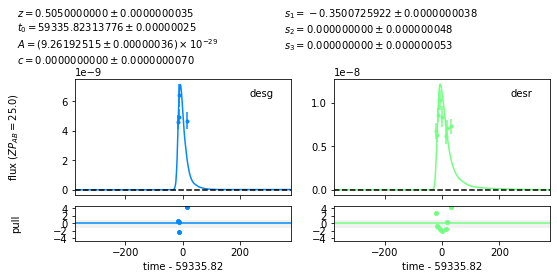

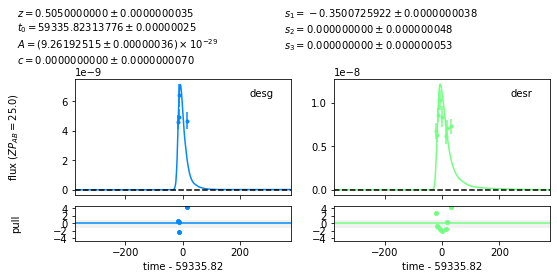

In [63]:
sncosmo.plot_lc(b, model=fitted_model, errors=result.errors)

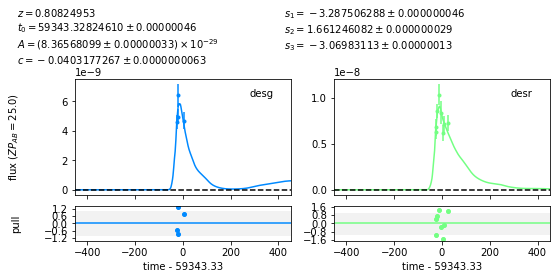

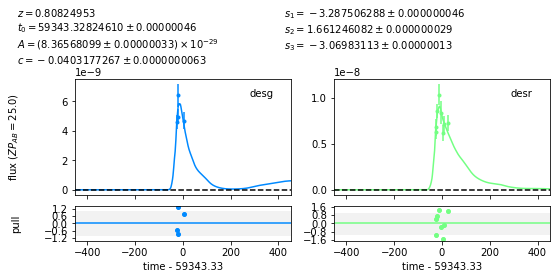

In [64]:
result2, fitted_model2 = sncosmo.fit_lc(b, model,
                                      ['t0', 'amplitude', 's1', 's2', 's3', 'color'],
                                        bounds={'z': (b.meta['redshift'],b.meta['redshift'])})

sncosmo.plot_lc(b, model=fitted_model2, errors=result2.errors)


In [12]:
result2.keys()


dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])

In [27]:
result2['param_names']

['z', 't0', 'amplitude', 'color', 's1', 's2', 's3']

In [81]:
result2['parameters']

array([ 8.08249530e-01,  5.93433282e+04,  8.36568099e-29, -4.03177267e-02,
       -3.28750629e+00,  1.66124608e+00, -3.06983113e+00])

In [73]:
result2['vparam_names']

['t0', 'amplitude', 'color', 's1', 's2', 's3']

In [48]:
result['nfit']

1

In [14]:
result2['chisq']

5.439927258397104e-06

In [15]:
result['chisq']

4.47718317769019e-07

In [16]:
classifier_plasticc = parsnip.Classifier.load('./predictions/classifier')

In [28]:
classifications_plastic_all = classifier_plasticc.classify(result2)

KeyError: 'color'

In [84]:
amplitudes = result2['parameters'][2]
redshifts = result2['parameters'][0]

luminosity = -2.5*np.log10(amplitudes)-45 - Planck18.distmod(redshifts).value
luminosity

-18.397719763289125

In [68]:
redshifts

0.80824953

In [80]:
amplitudes

8.365680988178879e-29

In [69]:
Planck18.distmod(redshifts).value

43.591466514696215

In [71]:
np.log10(amplitudes)

-28.07749870056284

In [77]:
amplitude_new = (
            1 * amplitudes
            * 10**(-0.4 * (20 + 25))
        )

In [78]:
amplitude_new

8.36568098817888e-47

In [79]:
luminosity = -2.5*np.log10(amplitude_new)+ 25- Planck18.distmod(redshifts).value
luminosity

96.6022802367109